In [1]:
import os
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def decode_pixels(pixels_str):
    """
    This function receives a list which contains the pixels as a space-separated code.
    For example, '1 3 10 5' implies pixels 1,2,3,10,11,12,13,14 are to be included in the mask
    """
    
    pixels_encoded_list = pixels_str.split(' ')
    pixels_list = []
    for i in range(0, len(pixels_encoded_list), 2):
        # Add to the pixels list all the pixels encoded by the 2 digits
        pixels_list += range(
            int(pixels_encoded_list[i]) - 1,
            int(pixels_encoded_list[i]) + int(pixels_encoded_list[i + 1]) - 1,
        )
        
    # Return the decoded list    
    return pixels_list

In [3]:
# Test the method for decoding pixels
print(decode_pixels('29102 3 29346 2 29602 1 29858 5'))

[29101, 29102, 29103, 29345, 29346, 29601, 29857, 29858, 29859, 29860, 29861]


In [4]:
csv_path = r"C:\Users\Agustin\Documents\RepositorioCEIA_Git\VpC2_Datasets\severstal-steel-defect-detection/train.csv"

# Define image dimensions
n_h = 256
n_w = 1600
n_class = 5

# open file in read mode
image_pixels = {}
with open(csv_path, 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = csv.reader(read_obj)

    # Iterate over each row in the csv using reader object
    for i, row in enumerate(csv_reader):
        try:
            # Skip headers
            if i == 0:
                continue

            # Initialize image in dict. The 0th layer is the background
            if row[0] not in image_pixels:
                image_pixels[row[0]] = np.zeros((n_w, n_h, n_class), dtype=bool)
                image_pixels[row[0]][:, :, 0] = np.ones((n_w, n_h), dtype=bool)

            # Generate the mask of the error type
            mask = np.zeros((n_h * n_w, 1), dtype=bool)
            mask[decode_pixels(row[2])] = True
            mask = mask.reshape(n_w, n_h)

            # Update channel of the given error
            image_pixels[row[0]][:, :, int(row[1])] = image_pixels[row[0]][:, :, int(row[1])] | mask
            image_pixels[row[0]][:, :, 0] = image_pixels[row[0]][:, :, 0] * ~mask
        except Exception as e:
            print(row[0], e)


In [5]:
image_pixels.keys()

dict_keys(['0002cc93b.jpg', '0007a71bf.jpg', '000a4bcdd.jpg', '000f6bf48.jpg', '0014fce06.jpg', '0025bde0c.jpg', '002af848d.jpg', '002fc4e19.jpg', '0030401a5.jpg', '0046839bd.jpg', '005d86c25.jpg', '005f02e20.jpg', '005f19695.jpg', '008621629.jpg', '0088260da.jpg', '008d0f87b.jpg', '008ef3d74.jpg', '0095cd374.jpg', '00ac8372f.jpg', '00af2671f.jpg', '00bc01bfe.jpg', '00bf8497a.jpg', '00c88fed0.jpg', '00cdb56a0.jpg', '00d639396.jpg', '00e0398ad.jpg', '00ec97699.jpg', '00f1665e6.jpg', '00f6e702c.jpg', '01053d28f.jpg', '010db68d1.jpg', '012a9a4c7.jpg', '012d29df4.jpg', '012f26693.jpg', '01338c0ea.jpg', '0139dd004.jpg', '0141c9bf3.jpg', '0148e9891.jpg', '014ebe543.jpg', '01540cab1.jpg', '01661826d.jpg', '0167a740e.jpg', '016af13d0.jpg', '016efe618.jpg', '01764ee81.jpg', '017c828a1.jpg', '018ccdfed.jpg', '01919944c.jpg', '019f42c2a.jpg', '01a1027ce.jpg', '01afbfa7a.jpg', '01b043500.jpg', '01b492dd6.jpg', '01c3ef286.jpg', '01cf446d4.jpg', '01cfacf80.jpg', '01df77e59.jpg', '01e020dc5.jpg', '01

In [6]:
image_pixels['0002cc93b.jpg'].shape

(1600, 256, 5)

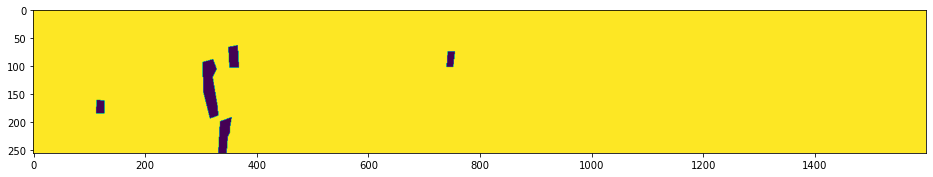

In [7]:
plt.figure(figsize=(16, 6))
plt.imshow(image_pixels['0002cc93b.jpg'][:, :, 0].T)